In [26]:
!git clone https://github.com/c-bun/NanoBiT-BRET.git

fatal: destination path 'NanoBiT-BRET' already exists and is not an empty directory.


In [27]:
# plot out the replicate date for QD emission at 638 nm
# use seaborn to plot the data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import drive
#drive.mount('/content/gdrive')

In [28]:
# import the data
data = pd.read_csv('/content/NanoBiT-BRET/BRET efficiencies/replicates_638.csv')

In [29]:
data

,SmBit,Luminescence counts
0,SmBit86-Pro3-His6,4887
1,His6-Pro3-SmBit86,23053
2,SmBit86-His6,18757
3,His6-SmBit86,6602
4,Tamra-SmBit86,1427
5,SmBit86,2011
6,PBS,0
7,SmBit86-Pro3-His6,4408
8,His6-Pro3-SmBit86,19610
9,SmBit86-His6,20119


In [30]:
# rename the "Luminescence counts" column
data = data.rename(columns={'Luminescence counts': 'Luminescence counts at 638 nm'})

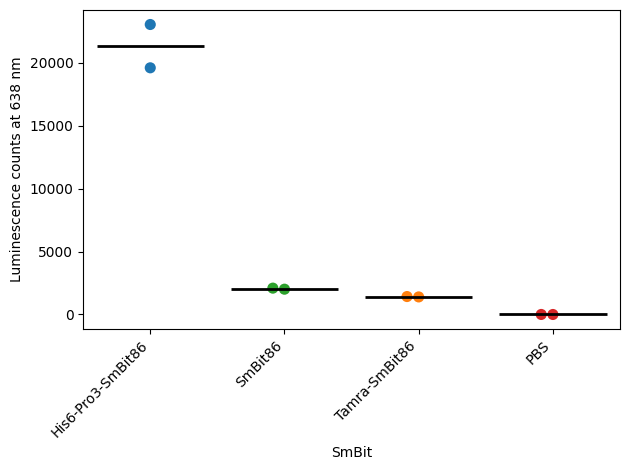

In [31]:
# plot with categries on the x-axis and the values on the y-axis with dots showing the individual data points and a line showing the mean
# first filter for everything except SmBit86-Pro3-His6, SmBit86-His6, and His6-SmBit86
data = data[data['SmBit'] != 'SmBit86-Pro3-His6']
data = data[data['SmBit'] != 'SmBit86-His6']
data = data[data['SmBit'] != 'His6-SmBit86']
sns.swarmplot(x="SmBit", y="Luminescence counts at 638 nm", data=data,
              hue='SmBit',
              # set the point size:
              size=8,
              # set the x axis order:
              order=['His6-Pro3-SmBit86', 'SmBit86', 'Tamra-SmBit86', 'PBS']
              )
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="SmBit",
            y="Luminescence counts at 638 nm",
            data=data,
            showfliers=False,
            showbox=False,
            showcaps=False,
)
# tilt the x-axis labels and align them with the ticks
plt.xticks(rotation=45, ha='right')
# export the plot to pdf with enough space for the labels
plt.tight_layout()
#plt.savefig('./replicates_638.pdf')
plt.show()

In [32]:
g = data.groupby('SmBit').mean()
g

,Luminescence counts at 638 nm
SmBit,
His6-Pro3-SmBit86,21331.5
PBS,1.0
SmBit86,2053.0
Tamra-SmBit86,1412.0


In [33]:
g.loc['His6-Pro3-SmBit86'] / g.loc['SmBit86']

,0
Luminescence counts at 638 nm,10.390404
